# Optimization of Topic Models


*   **Prerequisites:** It is expected from the learners to have an idea of Topic Modelling as an unsupervised machine learning tool for efficient text mining.
*   You can refer to my other course: Introduction to Topic Modeling for Business 
  (https://www.coursera.org/projects/introduction-to-topic-modeling-for-business) for basics of topic modelling
*   The **focus** of this project is on optimizing topic models using Grid Search method available in Scikit Learn package. 
*   The code for building basic topic model is given
*   We will be working out on finding the best fit/optimized model




##Tasks to be covered
### Task 1: Upload and explore dataset
### Task 2: Clean dataset & Visualize frequent words
### Task 3: Tokenization, Lemmatization and Word Document Matrix
### Task 4: Build LDA Model with Scikit Learn
### Task 5: Grid Search for Model Optimization
### Task 6: Visualization of Top N-words of Best Model

## Import Modules

In [1]:
# Import modules

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

#TextHero
!pip install texthero -U   
import texthero as hero

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
!pip install -U pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mailt\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Requirement already up-to-date: pyLDAvis in d:\anaconda\envs\py36\lib\site-packages (2.1.2)


## Task 1: Upload and explore dataset

In [2]:
# Store dataset in a Pandas Dataframe
#import io
#df = pd.read_csv(io.BytesIO(uploaded['.csv']))

# Importing the DataFrame

df = pd.read_csv('DigitalEconomyDatasetTM.csv')

# Check the Dimensions of the Dataset
print(df.shape)

# Validate the Dataset
df.head(3).append(df.tail(2))

(2423, 4)


,Authors,Title,Year,Abstract
0,"Nguyen Q.K., Dang Q.V.",Blockchain Technology - Opportunities for Emer...,2018,The recent major scientific conferences on the...
1,"Melnyk M., Korcelli-Olejniczak E., Chorna N., ...",Development of regional IT clusters in Ukraine...,2018,Introduction. Accelerated introduction of mode...
2,"Reisman R., Bertini M.",A novel architecture to monetize digital offer...,2018,As commerce continues to shift to the digital ...
2421,"DobrotÄƒ L.M., Turek Rahoveanu M.M., Simionesc...",Researches on the identification of mechanisms...,2019,"This paper proposes an economic instrument, a ..."
2422,"Mansor M., Ibrahim I., Udin N.M., Saad N.",Online businesses tax morale in supply chain r...,2019,The number of e-commerce (online) businesses i...


## Task 2: Clean dataset & Visualize frequent words

In [3]:
#Pass a custom pipeline as argument to clean

# Texthero - Text Processing Library for Corpus Preprocessing

from texthero import preprocessing

# Build Pipelines
custom_pipeline = [preprocessing.lowercase,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_urls]

# Apply the Transformations to the Text data
data = hero.clean(df['Abstract'])

In [5]:
# Validate the Datasets
data[:5]

0    recent major scientific conferences innovatube...
1    introduction accelerated introduction modern i...
2    commerce continues shift digital domain organi...
3    purpose going transition societies economies t...
4    purpose purpose paper identify key challenges ...
Name: Abstract, dtype: object

In [6]:
# Custom STOPWORDS removal
from texthero import stopwords

# Add the Default Functionality
default_stopwords = stopwords.DEFAULT

# Add some Extra Stopwords - Updating the Stopword List
custom_stopwords = default_stopwords.union(set(["c","two", "results", "first", "datum", "research", "economic", "study", "data", "development", "result", "analysis", "model", 
                 "based", "using", "new", "market", "business", "system", "use", "city", "research", "paper", "finding", "user", "right", "issue", "also"])) ## Add as per requirement

# Apply Remove Stopwords method
data = hero.remove_stopwords(data, custom_stopwords )

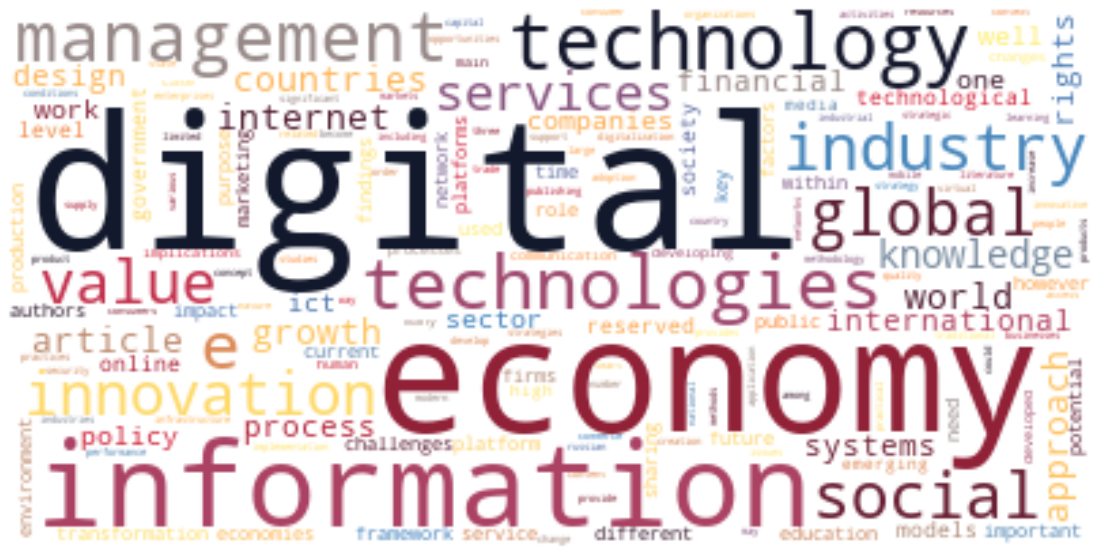

In [8]:
# Creating wordcloud to Visualize the Data
hero.visualization.wordcloud(data, font_path = None, width = 400, height = 200, max_words=400, 
                             mask=None, contour_width=0, 
                             contour_color='PAPAYAWHIP', background_color='WHITE', 
                             relative_scaling='auto', colormap=None, return_figure=False)

## Task 3: Tokenization, Lemmatization and Word Document Matrix

In [9]:
# Tokenize

def sent_to_words(sentences):
    for sentence in sentences:
        # Tokenize the Words and then Lemmatize it
        yield(gensim.utils.simple_preprocess(str(sentence), deacc= True))  # deacc=True removes punctuations

# Apply the Function
data_words = list(sent_to_words(data))

# Validate the Function usage
print(data_words[:1])

[['recent', 'major', 'scientific', 'conferences', 'innovatube', 'frontier', 'ifs', 'focused', 'four', 'areas', 'pioneering', 'technologies', 'including', 'artificial', 'intelligence', 'internet', 'things', 'blockchain', 'augmented', 'reality', 'virtual', 'reality', 'blockchain', 'gained', 'lot', 'attention', 'technology', 'created', 'fever', 'bitcoin', 'ethereum', 'digital', 'coins', 'great', 'potentials', 'change', 'nature', 'real', 'world', 'everyone', 'lives', 'various', 'studies', 'blockchain', 'however', 'reality', 'percentage', 'people', 'understand', 'blockchain', 'remain', 'minute', 'highlight', 'important', 'role', 'blockchain', 'technology', 'future', 'world', 'especially', 'developing', 'countries', 'ieee']]


In [11]:
# Lemmatize

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adjective, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Valdiate the Lemmatized Value
print(data_lemmatized[:2])

['recent major scientific conference focus area pioneer technology include artificial intelligence internet thing blockchain augment reality virtual reality blockchain gain lot attention technology create fever bitcoin ethereum coin potential change nature real world live various study blockchain however reality percentage people understand remain minute highlight important role blockchain technology future world especially develop country', 'introduction accelerate introduction modern technology area country social economy national information infrastructure integration global information space improvement information security condition strategic objective society furthermore recent year characterise active creation network organisation form cluster cooperation sphere joint endeavour company scientific educational establishment actor organisation cluster contribute optimisation process management course creation introduction information technologie product service company form powerfu

In [12]:
# Creating Word-Document Matrix

vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum number occurences of a word required
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}')  # Filter alphanumeric characters with len > 3
                            
# Applying the Vectorizer to Lemmatized Documents
data_vectorized = vectorizer.fit_transform(data_lemmatized)

# Validate the Outputs
data_vectorized[:5]

<5x2240 sparse matrix of type '<class 'numpy.int64'>'
	with 423 stored elements in Compressed Sparse Row format>

## Task 4: Build LDA Model with Scikit Learn

In [13]:
# Build LDA model with Sklearn

lda_model = LatentDirichletAllocation(n_components=15,               # Number of topics
                                      max_iter= 20,                   # Max learning iterations
                                      learning_method='online',   
                                      random_state= 42,              # Random state
                                      batch_size= 128)               # n docs in each learning iter
                                            
# Apply the LDA Model to the Sparse Matrix and get 15 relevant Topics
lda_output = lda_model.fit_transform(data_vectorized)

# Model attributes
print(lda_model)

LatentDirichletAllocation(learning_method='online', max_iter=20,
                          n_components=15, random_state=42)


In [14]:
#Evaluate model quality

# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp((-1) * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

Log Likelihood:  -1399776.1933575338
Perplexity:  1063.215853237072


In [16]:
#Visualize with pyLDAvis

# Plot Latent Themes and Associated words with them

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds= 'tsne')

# Plot the Panel
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      114.344879  114.308296       1        1  20.854565
13     105.821045  -93.749626       2        1  14.849886
10    -138.334473   95.320763       3        1  14.775057
5       -7.436697  111.259697       4        1  11.016271
12    -207.550629 -105.472603       5        1  10.992356
7       52.817650   14.603765       6        1   6.324409
3      168.010849    6.806950       7        1   4.525789
0      -94.169601 -157.789551       8        1   4.020530
2     -122.849174  -39.059418       9        1   3.864899
11     -94.894264  195.408295      10        1   2.275510
8       24.927401 -180.464874      11        1   1.858344
6      -53.413467   26.832108      12        1   1.744089
14     -12.255850  -72.093201      13        1   1.488779
9     -224.217957   28.070581      14        1   1.274600
1       36.154255  209.427582      15        1   0.134915, topic_info=            Term         Freq        Total Category  logprob  loglift
1855     service  1137.000000  1137.000000  Default   30.000  30.0000
1496    platform   740.000000   740.000000  Default   29.000  29.0000
411     consumer   596.000000   596.000000  Default   28.000  28.0000
2226        work   664.000000   664.000000  Default   27.000  27.0000
1059    industry  1133.000000  1133.000000  Default   26.000  26.0000
...          ...          ...          ...      ...      ...      ...
1056  industrial     0.069187   268.472201  Topic15   -8.273  -1.6554
648      economy     0.069186  3397.539839  Topic15   -8.273  -4.1935
1592     program     0.069186   171.212607  Topic15   -8.273  -1.2056
1152   knowledge     0.069186   702.785135  Topic15   -8.273  -2.6177
744     estimate     0.069184    84.873701  Topic15   -8.273  -0.5039

[931 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5        14  0.936066    abuse
8         5  0.928183  academy
13        1  0.054891   access
13        2  0.531760   access
13        3  0.048030   access
...     ...       ...      ...
2237      4  0.014899    young
2237      8  0.253277    young
2237     11  0.715136    young
2238      3  0.947881    youth
2239     10  0.960893     zone

[2664 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 14, 11, 6, 13, 8, 4, 1, 3, 12, 9, 7, 15, 10, 2])

As the bubbles are seperate, we can infer that the 15 topics are distinct from each other. But Size of bubble shows the contribution (Very less for around 10 topics). Interpretation of the Model requires Human Judgement and Domain Expertise.

## Task 5: Grid Search for Model Optimization

In [17]:
# Grid Search for Best LDA Model - Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define Search Param
params = {'n_components': [10, 15, 20,25, 30], 'learning_decay': [0.5, 0.7, 0.9]}

# Initiate LDA Model
lda_model = LatentDirichletAllocation()

# Grid Search
cv = GridSearchCV(lda_model, param_grid= params)

# Perform Grid Search
cv.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [18]:
# Get the Best Model
best_lda_model = cv.best_estimator_

# Model Parameters
print("Best Model's Params: ", cv.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", cv.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -309421.63790395507
Model Perplexity:  1053.0148703587017


## Task 6: Visualization of Top N-words of Best Model - For Human Interpretability

In [19]:
#Visualize with pyLDAvis

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds= 'tsne')

# Plot the Panel
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  15.836804
5       0.648955  71.707100       2        1  14.725339
9      71.019684   9.971006       3        1  12.054471
4       3.785981  33.185135       4        1  11.997068
1     -42.666500  -9.222070       5        1  11.330841
6      -3.621689 -43.526516       6        1  11.194593
2      -3.632402  -4.171708       7        1   8.263737
0     -36.584400  35.804413       8        1   5.894633
3      44.391380  50.615383       9        1   4.761933
7      40.235809 -31.591665      10        1   3.940581, topic_info=            Term        Freq       Total Category  logprob  loglift
852    financial  524.000000  524.000000  Default  30.0000  30.0000
1496    platform  735.000000  735.000000  Default  29.0000  29.0000
411     consumer  593.000000  593.000000  Default  28.0000  28.0000
458      country  912.000000  912.000000  Default  27.0000  27.0000
1152   knowledge  708.000000  708.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1899     society   37.439501  450.170625  Topic10  -5.3538   0.7469
1080  innovation   38.745072  780.037495  Topic10  -5.3195   0.2315
2231       world   36.850412  581.620906  Topic10  -5.3696   0.4749
2054        term   33.469962  377.446586  Topic10  -5.4659   0.8111
1500      policy   35.187636  707.857058  Topic10  -5.4158   0.2323

[688 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5         6  0.144226   abuse
5         8  0.793243   abuse
13        1  0.122659  access
13        2  0.006814  access
13        3  0.293018  access
...     ...       ...     ...
2237      8  0.121299   young
2238      4  0.968323   youth
2239      2  0.159260    zone
2239      5  0.053087    zone
2239      7  0.743216    zone

[2634 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 5, 2, 7, 3, 1, 4, 8])

In [21]:
# Define a Function to Show top n keywords for each topic
def show_topics(vectorizer= vectorizer, lda_model= lda_model, n_words= 25):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    
    # Loop through and Append to the Empty list
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs)) # Takes the words in the given Indexes
    return topic_keywords

# Initiate the Function
topic_keywords = show_topics(vectorizer, best_lda_model, 15)        

# Creating a Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+ str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+ str(i) for i in range(df_topic_keywords.shape[0])]

# Show the DataFrame
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,consumer,digital,law,online,economy,legal,privacy,personal,copyright,protection,social,issue,policy,self,internet
Topic 1,country,economy,firm,digital,develop,global,tax,government,marketing,value,emerge,market,ict,peer,policy
Topic 2,economy,digital,technology,sector,country,growth,innovation,technological,high,increase,change,industrial,internet,level,factor
Topic 3,financial,economy,digital,bank,technology,investment,banking,price,risk,finance,asset,innovation,policy,fintech,regulatory
Topic 4,technology,industry,digital,economy,sector,government,public,smart,policy,tourism,city,develop,urban,creative,space
Topic 5,economy,digital,technology,process,information,management,method,education,modern,problem,article,author,implementation,approach,develop
Topic 6,platform,economy,digital,work,service,value,share,worker,industry,change,company,author,form,article,create
Topic 7,payment,economy,knowledge,money,digital,transaction,internet,cash,currency,financial,make,technology,bitcoin,reserve,change
Topic 8,design,network,service,management,information,product,knowledge,process,company,customer,technology,model,application,value,digital
Topic 9,technology,economy,digital,medium,change,information,social,global,sme,enterprise,world,challenge,industry,strategy,communication
